In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# drop unneccessary columns
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

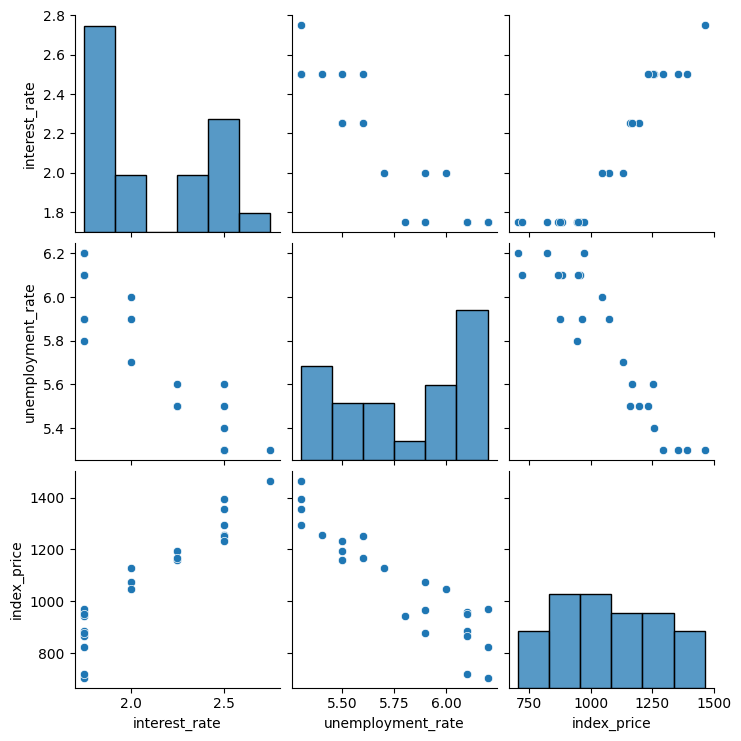

In [7]:
import seaborn as sns

sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

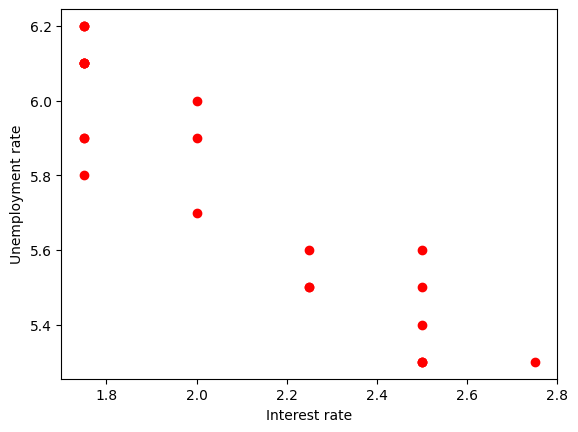

In [9]:
# Visualization the datapoints more closely
plt.scatter(df["interest_rate"], df["unemployment_rate"], color="r")
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [10]:
# Independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

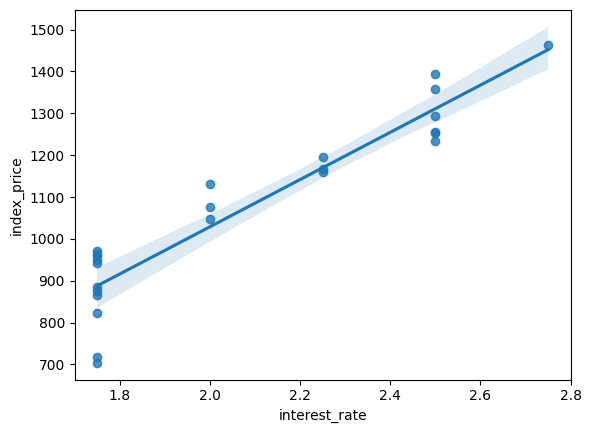

In [15]:
sns.regplot(x=df["interest_rate"], y=df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

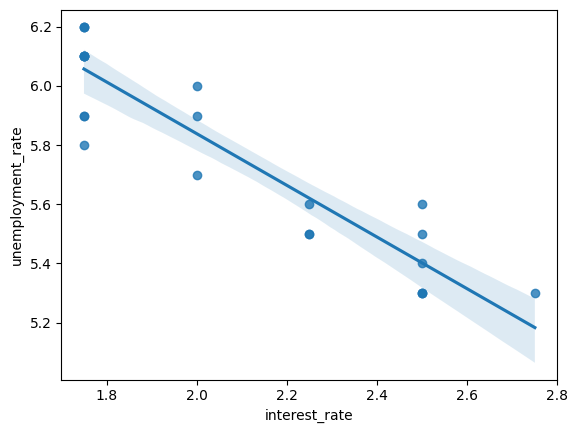

In [16]:
sns.regplot(x=df["interest_rate"], y=df["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

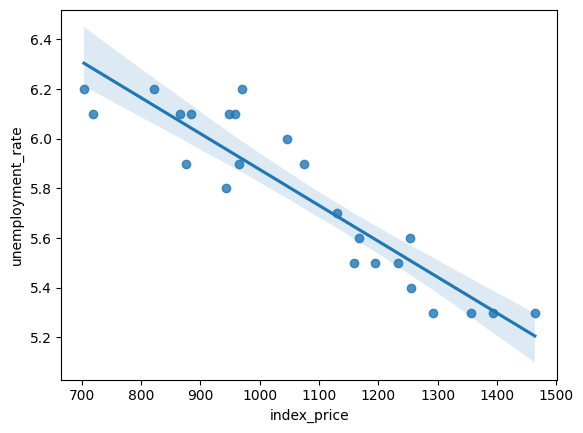

In [17]:
sns.regplot(x=df["index_price"], y=df["unemployment_rate"])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [22]:
regression.fit(X_train, y_train)

LinearRegression()

### Cross-Validation (CV)

- **Purpose:** A resampling technique used to evaluate machine learning models more reliably, especially when data is limited. It helps assess how a model will generalize to an independent (unseen) dataset.
- **Problem Solved:** Avoids the potential bias of a single train/test split. Performance can vary significantly depending on which data points end up in the training vs. test set. CV gives a more robust estimate.

**Common Method: K-Fold Cross-Validation**

1.  **Split:** Divide the entire dataset randomly into `K` equal-sized subsets (called "folds").
2.  **Iterate:** For each fold `k` from 1 to `K`:
    - **Train:** Use `K-1` folds as the training data.
    - **Validate:** Use the remaining fold `k` as the validation (test) data.
    - **Evaluate:** Calculate the performance metric (e.g., accuracy, F1-score, MSE) on the validation fold `k`.
3.  **Aggregate:** Average the performance metrics obtained from all `K` iterations. This average score is the cross-validation performance estimate.

**Why Use CV?**

- **Robust Performance Estimate:** Reduces variance associated with a single train/test split. Provides a better idea of how the model performs on average on unseen data.
- **Better Parameter Tuning:** Useful for selecting hyperparameters (e.g., using `GridSearchCV` or `RandomizedSearchCV`, which incorporate CV).
- **Efficient Data Use:** Every data point gets used for both training and validation across the different folds.

**Other Types:**

- **Stratified K-Fold:** Ensures that each fold maintains the same proportion of class labels as the original dataset (important for imbalanced classification).
- **Leave-One-Out (LOO):** K equals the number of data points (N). Trains on N-1 points, tests on 1. Computationally expensive.

**Key Takeaway:** CV provides a more reliable estimate of model generalization performance than a single train/test split by systematically rotating through different train/validation sets.


In [23]:
## cross validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(
    regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3
)

In [24]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [25]:
np.mean(validation_score)

-5914.828180162386

In [26]:
## prediction
y_pred = regression.predict(X_test)

In [27]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [28]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [29]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

# display adjusted R-squared
print(1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

0.8278978091457145
0.7131630152428576


## Assumptions


1.  **Linearity:**
    - **Assumption:** The relationship between the independent variables (predictors) and the _mean_ of the dependent variable (outcome) is linear.
    - **Check:** Scatter plots of residuals vs. predicted values (should show no pattern), or residuals vs. individual predictors. Component-plus-residual plots.


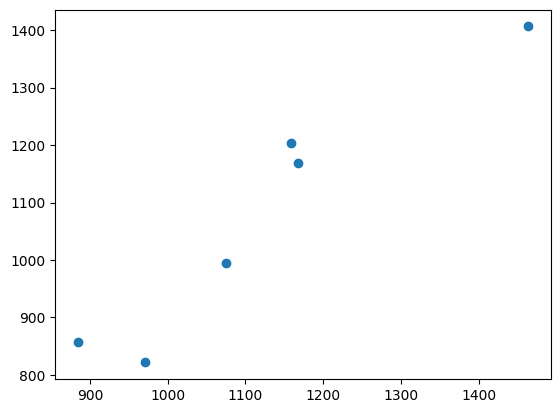

In [30]:
# No pattern
plt.scatter(y_test, y_pred)

In [31]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


**Normality of Residuals:**
_ **Assumption:** The residuals are approximately normally distributed. This is particularly important for hypothesis testing and constructing confidence intervals, especially with smaller sample sizes.
_ **Check:** Q-Q plot (Quantile-Quantile plot) of residuals (should follow a straight line). Histogram of residuals. Normality tests (e.g., Shapiro-Wilk, Kolmogorov-Smirnov).
* **Note:** The *residuals\* need to be normal, not necessarily the variables themselves. The Central Limit Theorem helps relax this requirement for large sample sizes concerning coefficient estimation, but it remains important for inference.


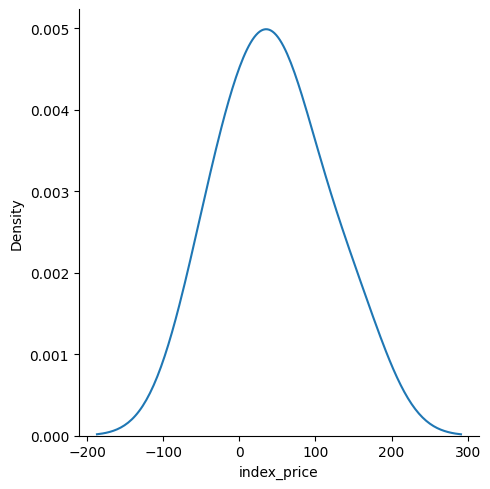

In [32]:
## Plot this residuals
sns.displot(residuals, kind="kde")

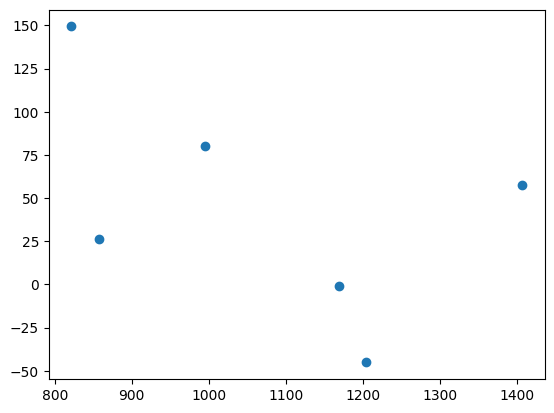

In [33]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

2.  **Independence of Residuals:**

    - **Assumption:** The residuals (errors) are independent of each other. One observation's residual does not predict another's.
    - **Check:** Durbin-Watson test (especially for time series data). Examining the order of data collection if possible. Residual plots vs. time or sequence.
    - **Violation:** Common in time-series data (autocorrelation).

3.  **No (or Little) Multicollinearity:**
    - **Assumption:** The independent variables are not highly correlated with each other.
    - **Check:** Variance Inflation Factor (VIF) for each predictor (VIF > 5 or 10 often indicates problematic multicollinearity). Correlation matrix between predictors.
    - **Violation:** Makes it difficult to estimate the individual effect of each predictor, increases standard errors of coefficients, making them unstable and hard to interpret.

(Often considered implicitly) 6. **No Influential Outliers:**
_ **Assumption:** There are no single data points that excessively influence the regression model.
_ **Check:** Leverage plots, Cook's distance.


In [34]:
## OLS Linear Regression
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [35]:
model.summary()

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                       0.754
Time:                        22:16:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(regression.coef_)

[  88.27275507 -116.25716066]
